In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
diet=pd.read_csv('/kaggle/input/foodcom-recipes-and-reviews/recipes.csv')

In [2]:
diet.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


In [3]:
diet.shape

(522517, 28)

In [4]:
diet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    522517 non-null  int64  
 1   Name                        522517 non-null  object 
 2   AuthorId                    522517 non-null  int64  
 3   AuthorName                  522517 non-null  object 
 4   CookTime                    439972 non-null  object 
 5   PrepTime                    522517 non-null  object 
 6   TotalTime                   522517 non-null  object 
 7   DatePublished               522517 non-null  object 
 8   Description                 522512 non-null  object 
 9   Images                      522516 non-null  object 
 10  RecipeCategory              521766 non-null  object 
 11  Keywords                    505280 non-null  object 
 12  RecipeIngredientQuantities  522514 non-null  object 
 13  RecipeIngredie

In [5]:
diet.isnull().sum()

RecipeId                           0
Name                               0
AuthorId                           0
AuthorName                         0
CookTime                       82545
PrepTime                           0
TotalTime                          0
DatePublished                      0
Description                        5
Images                             1
RecipeCategory                   751
Keywords                       17237
RecipeIngredientQuantities         3
RecipeIngredientParts              0
AggregatedRating              253223
ReviewCount                   247489
Calories                           0
FatContent                         0
SaturatedFatContent                0
CholesterolContent                 0
SodiumContent                      0
CarbohydrateContent                0
FiberContent                       0
SugarContent                       0
ProteinContent                     0
RecipeServings                182911
RecipeYield                   348071
R

In [6]:

selected_columns = ['Name','Calories', 'FatContent', 'SaturatedFatContent','CholesterolContent', 'SodiumContent', 'CarbohydrateContent','FiberContent', 'SugarContent', 'ProteinContent','RecipeInstructions']

diet = diet[selected_columns]


In [7]:
diet.head()

,Name,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
0,Low-Fat Berry Blue Frozen Dessert,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,Biryani,1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,"c(""Soak saffron in warm milk for 5 minutes and..."
2,Best Lemonade,311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,Carina's Tofu-Vegetable Kebabs,536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,"c(""Drain the tofu, carefully squeezing out exc..."
4,Cabbage Soup,103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,"c(""Mix everything together and bring to a boil..."


In [8]:
diet.shape

(522517, 11)

In [9]:
diet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Name                 522517 non-null  object 
 1   Calories             522517 non-null  float64
 2   FatContent           522517 non-null  float64
 3   SaturatedFatContent  522517 non-null  float64
 4   CholesterolContent   522517 non-null  float64
 5   SodiumContent        522517 non-null  float64
 6   CarbohydrateContent  522517 non-null  float64
 7   FiberContent         522517 non-null  float64
 8   SugarContent         522517 non-null  float64
 9   ProteinContent       522517 non-null  float64
 10  RecipeInstructions   522517 non-null  object 
dtypes: float64(9), object(2)
memory usage: 43.9+ MB


In [10]:
diet.isnull().sum()

Name                   0
Calories               0
FatContent             0
SaturatedFatContent    0
CholesterolContent     0
SodiumContent          0
CarbohydrateContent    0
FiberContent           0
SugarContent           0
ProteinContent         0
RecipeInstructions     0
dtype: int64

In [30]:
diet.describe()

,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
count,522517.000000,522517.000000,522517.000000,522517.000000,5.225170e+05,522517.000000,522517.000000,522517.000000,522517.000000
mean,484.438580,24.614922,9.559457,86.487003,7.672639e+02,49.089092,3.843242,21.878254,17.469510
std,1397.116649,111.485798,46.622621,301.987009,4.203621e+03,180.822062,8.603163,142.620191,40.128837
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,174.200000,5.600000,1.500000,3.800000,1.233000e+02,12.800000,0.800000,2.500000,3.500000
50%,317.100000,13.800000,4.700000,42.600000,3.533000e+02,28.200000,2.200000,6.400000,9.100000
75%,529.100000,27.400000,10.800000,107.900000,7.922000e+02,51.100000,4.600000,17.900000,25.000000
max,612854.600000,64368.100000,26740.600000,130456.400000,1.246921e+06,108294.600000,3012.000000,90682.300000,18396.200000


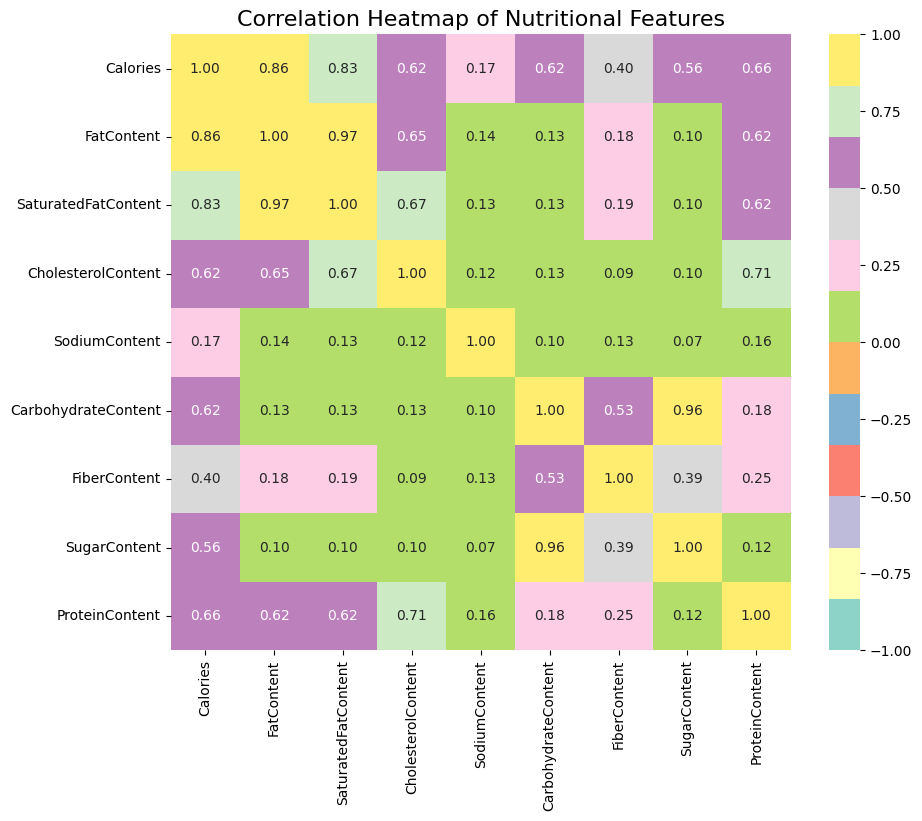

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
columns=['Calories','FatContent','SaturatedFatContent','CholesterolContent','SodiumContent','CarbohydrateContent','FiberContent','SugarContent','ProteinContent']
corr = diet[columns].corr()
plt.figure(figsize=(10, 8))  # Set the figure size for the heatmap
sns.heatmap(corr, annot=True, cmap='Set3', fmt='.2f', vmin=-1, vmax=1)  
plt.title('Correlation Heatmap of Nutritional Features', fontsize=16)  # Set the title of the heatmap
plt.show()  # Display the heatmap

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import re
import string

# Load preprocessed dataset
selected_columns = ['Name','Calories', 'FatContent', 'SaturatedFatContent','CholesterolContent', 'SodiumContent', 'CarbohydrateContent','FiberContent', 'SugarContent', 'ProteinContent','RecipeInstructions']

diet = pd.read_csv(r'recipes.csv')[selected_columns]  # Load your dataset

# Preprocessing function to clean the text
def preprocess_text(text):
    # Remove special characters using regular expressions
    text = re.sub(r'[@#$%^&*!`~]', '', text)  # Removes specific special characters
    # Optionally, you can add additional text preprocessing steps like lowercasing, removing extra spaces, etc.
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = text.strip()  # Remove leading and trailing whitespaces
    return text

def clean_instructions(text):
    # Remove the leading 'c' and quotes
    text = text.lstrip('c("').rstrip('",)')
    # Remove commas
    text = text.replace(',', '')
    # Remove any remaining special characters if needed
    text = text.translate(str.maketrans("", "", string.punctuation))
    return text

diet['Name'] = diet['Name'].apply(preprocess_text)
diet['RecipeInstructions'] = diet['RecipeInstructions'].apply(clean_instructions)

# Get User Input
user_profile = {}
user_profile["age"] = int(input("Enter your age: "))
user_profile["sex"] = input("Enter your sex (male/female): ").lower()
user_profile["weight"] = float(input("Enter your weight (kg): "))
user_profile["height"] = float(input("Enter your height (cm): "))
user_profile["activity_level"] = input("Enter your activity level (sedentary, lightly_active, moderate, very_active, extra_active): ").lower()
user_profile["goal"] = input("Enter your goal (weight_loss, weight_gain, maintenance): ").lower()
user_profile["diet_preference"] = input("Enter your dietary preference (vegetarian, vegan, etc.): ").lower()
user_profile["allergies"] = input("Enter allergies (comma-separated, e.g., nuts, gluten): ").split(", ")

# Step 1: Calculate BMR using Mifflin-St Jeor Formula
def calculate_bmr(weight, height, age, sex):
    if sex == "male":
        return (9.99 * weight) + (6.25 * height) - (4.92 * age) + 5
    else:
        return (9.99 * weight) + (6.25 * height) - (4.92 * age) - 161

# Step 2: Calculate TDEE (Total Daily Energy Expenditure) based on updated activity levels
def calculate_tdee(bmr, activity_level):
    activity_multipliers = {
        "sedentary": 1.2,
        "lightly_active": 1.375,
        "moderate": 1.55,
        "very_active": 1.725,
        "extra_active": 1.9
    }
    return bmr * activity_multipliers.get(activity_level, 1.2)

# Step 3: Adjust Calories Based on Goal
def adjust_calories(tdee, goal):
    if goal == "weight_loss":
        return tdee - 500  # 500 kcal deficit
    elif goal == "weight_gain":
        return tdee + 500  # 500 kcal surplus
    else:
        return tdee  # Maintenance

# Step 4: Macronutrient Distribution
def calculate_macros(calories, goal):
    if goal == "weight_loss":
        protein_ratio, fat_ratio, carb_ratio = 0.3, 0.3, 0.4  # Balanced for weight loss
    elif goal == "weight_gain":
        protein_ratio, fat_ratio, carb_ratio = 0.25, 0.3, 0.45  # Higher carbs for weight gain
    else:
        protein_ratio, fat_ratio, carb_ratio = 0.3, 0.3, 0.4  # Balanced for maintenance
    
    protein = (calories * protein_ratio) / 4  # 1g protein = 4 kcal
    fat = (calories * fat_ratio) / 9  # 1g fat = 9 kcal
    carbs = (calories * carb_ratio) / 4  # 1g carb = 4 kcal
    return protein, fat, carbs

# Step 5: Compute User Profile Nutritional Needs
bmr = calculate_bmr(user_profile["weight"], user_profile["height"], user_profile["age"], user_profile["sex"])
tdee = calculate_tdee(bmr, user_profile["activity_level"])
target_calories = adjust_calories(tdee, user_profile["goal"])
target_protein, target_fat, target_carbs = calculate_macros(target_calories, user_profile["goal"])

# Step 6: Filter Recipes Based on Diet Preferences & Allergies
filtered_diet = diet.copy()
if user_profile["diet_preference"] in ["vegetarian", "vegan"]:
    filtered_diet = filtered_diet[filtered_diet["RecipeInstructions"].str.contains(user_profile["diet_preference"], case=False, na=False)]

for allergen in user_profile["allergies"]:
    filtered_diet = filtered_diet[~filtered_diet["RecipeInstructions"].str.contains(allergen, case=False, na=False)]

# Step 7: Content-Based Recommendation Using Cosine Similarity
def recommend_meals(user_calories, user_fat, user_carbs, user_protein, top_n=5):
    # User profile vector includes all 9 features, and we fill missing features with zeros (or use other defaults)
    user_profile_vector = np.array([[user_calories, user_fat, user_carbs, user_protein, 0, 0, 0, 0, 0]])
    
    # Compute Cosine Similarity
    similarities = cosine_similarity(user_profile_vector, filtered_diet.iloc[:, 1:10].values)  # Adjusting for 9 features
    
    # Rank meals based on similarity
    filtered_diet["Similarity"] = similarities[0]
    top_recommendations = filtered_diet.sort_values(by="Similarity", ascending=False).head(top_n)
    
    # Return recommendations in the desired format
    recommendations = []
    for _, row in top_recommendations.iterrows():
        recommendation = {
            "Name": row["Name"],
            "Calories": row["Calories"],
            "ProteinContent": row["ProteinContent"],
            "FatContent": row["FatContent"],
            "CarbohydrateContent": row["CarbohydrateContent"],
            "SodiumContent": row["SodiumContent"],
            "RecipeInstructions": row["RecipeInstructions"]
        }
        recommendations.append(recommendation)
    
    return recommendations

# Step 8: Get Recommendations
recommendations = recommend_meals(target_calories, target_fat, target_carbs, target_protein, top_n=5)

# Print the recommendations in the desired format
for rec in recommendations:
    print(f"Name: {rec['Name']}")
    print(f"Calories: {rec['Calories']}")
    print(f"ProteinContent: {rec['ProteinContent']}")
    print(f"FatContent: {rec['FatContent']}")
    print(f"CarbohydrateContent: {rec['CarbohydrateContent']}")
    print(f"SodiumContent: {rec['SodiumContent']}")
    print(f"RecipeInstructions: {rec['RecipeInstructions']}")
    print("\n" + "-"*50 + "\n")


Enter your age:  20
Enter your sex (male/female):  female
Enter your weight (kg):  65
Enter your height (cm):  160
Enter your activity level (sedentary, lightly_active, moderate, very_active, extra_active):  lightly active
Enter your goal (weight_loss, weight_gain, maintenance):  weight loss
Enter your dietary preference (vegetarian, vegan, etc.):  vegan
Enter allergies (comma-separated, e.g., nuts, gluten):  none


Name: spinach pasta salad recipe | kathyamp;039;s vegan kitchen
Calories: 21.8
ProteinContent: 0.0
FatContent: 2.4
CarbohydrateContent: 0.2
SodiumContent: 0.1
RecipeInstructions: INSTRUCTIONS ASIAN TOFU Press Tofu according to directions cut into two equal pieces and place in a container Add all marinade ingredients together whisk and pour over tofu Cover and place in the refrigerator for at least 1 hour MUSHROOMS SLice mushrooms thin Place in a container Whisk marinade ingredients together Pour over mushrooms Cover and refrigerate for at least 1 hour GRILLING TOFU OR BAKE AIRFRY OR SAUTE Preheat grill to mediumlow 
Place tofu pieces directly on the grill or on a grill mat or in a grill basket Then cook 78 minutes on each side Remove from grill wait until cool to the touch and then cut into bitesized pieces Set aside or place back into the container with the leftover marinade and refrigerate until ready to use VEGETABLES Dice white onion Drain and chop water chestnuts Cut ends off lett